In [1]:
import re
import ast
import pandas as pd
from pathlib import Path

SRC_DIR = Path('/Volumes/external_drive')

In [43]:
df = pd.read_csv('image_high_res.csv')
df = df[df['tags_list'].notnull()]
df = df[df['categories'].notnull()]

In [44]:
df['models'] = df['models'].apply(ast.literal_eval)
df['categories'] = df['categories'].apply(ast.literal_eval)
df['tags_list'] = df['tags_list'].apply(ast.literal_eval)

<Axes: ylabel='Frequency'>

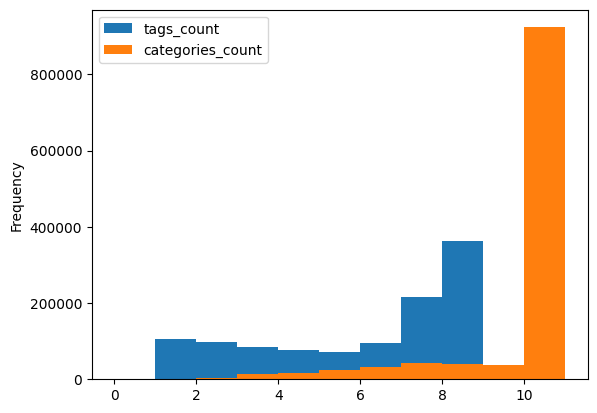

In [45]:
df['tags_count'] = df['tags_list'].apply(len)
df['categories_count'] = df['categories'].apply(len)
# Plot the distribution of tags and categories
df['tags_count'].plot(kind='hist', bins = 10, legend=True)
df['categories_count'].plot(kind='hist', bins = 10, legend=True)

In [47]:
filtered = df[(df['categories_count'] > 9) & (df['tags_count'] > 6)]
filtered.shape

(542739, 13)

In [37]:
def dynamic_prompt(categories: list[str], tags: list[str]) -> str:
    prompt = f"""
You are given a single image from a gallery. Your task is to tag and categorize this image based on a given set of categories and tags. The tags may apply to the entire gallery but not necessarily to every individual image.

**Categories**: {categories}
**Tags**: {tags}

For the given image, identify the relevant tags from the list above. If a tag does not apply to the specific image, do not include it in your response for that image.

#### Instructions:
1. Review the provided image.
2. Assign relevant tags from the provided **Tags** to the image.
3. Assign relevant categories from the provided **Categories** to the image.
4. Do not include tags that do not apply to the image.
5. If you are unsure about a tag or category, feel free to skip it.
6. Do not use more tags or categories than provided.

### Output:
Tags should be structured for easy parsing as JSON. For example: """
    prompt += """
{
    'tags': ['tag1', 'tag2', 'tag3'],
    'categories': ['category1', 'category2']
}
"""
    return prompt

In [48]:
import random

random_choice = filtered.iloc[random.randint(0, filtered.shape[0])]
p = dynamic_prompt(random_choice['categories'], random_choice['tags_list'])
print(p)


You are given a single image from a gallery. Your task is to tag and categorize this image based on a given set of categories and tags. The tags may apply to the entire gallery but not necessarily to every individual image.

**Categories**: ['Asian', 'Facial', 'Reality', 'Big Cock', 'Pussy', 'Ass', 'Shaved', 'Clothed', 'Skirt', 'Handjob']
**Tags**: ['Big Ass Asian', 'Asian Hardcore', 'Asian Cumshot', 'Asian Ass', 'Asian Facial', 'Asian Doggystyle', 'Shaved Asian Pussy']

For the given image, identify the relevant tags from the list above. If a tag does not apply to the specific image, do not include it in your response for that image.

#### Instructions:
1. Review the provided image.
2. Assign relevant tags from the provided **Tags** to the image.
3. Assign relevant categories from the provided **Categories** to the image.
4. Do not include tags that do not apply to the image.
5. If you are unsure about a tag or category, feel free to skip it.
6. Do not use more tags or categories tha

In [22]:
choice.filename

'54465965_111_0b22.jpg'

In [ ]:
aged_df = df[df['categories'].apply(lambda x: any(category in age_tags for category in x))]
looks_df = aged_df[aged_df['categories'].apply(lambda x: any(category in physical_look_tags for category in x))]
utility_df = looks_df[looks_df['categories'].apply(lambda x: any(category in utility_tags for category in x))]
negative_aged_df = utility_df[
    utility_df['categories'].apply(lambda x: all(category not in negative_tags for category in x))]
negative_aged_df = negative_aged_df.reset_index(drop=True)

In [ ]:
negative_aged_df.shape

In [ ]:
negative_aged_df.head()

In [ ]:
all_tags = sorted(list(set([item for sublist in negative_aged_df['categories'] for item in sublist])))


def clean_list(lst):
    lst = [re.sub(r'\s+', ' ', item) for item in lst]
    return list(set([item for item in lst if item != '']))


all_tags = clean_list(all_tags)
all_tags = sorted(list(clean_list(all_tags)))
all_tags

In [ ]:
len(all_tags)

In [ ]:
import random
from PIL import Image

random_image = random.randint(0, negative_aged_df.shape[0])
row = negative_aged_df.iloc[random_image]
path = SRC_DIR / row.category / row.gallery_name / row.filename
print(path)
image = Image.open(path)
image.show()